# CE4172 TinyML project

## Recognizing sign language using gestures

Done by: Chloe Lim Ke Yee

### Description
Visual-Gestural Communication (VGC) is the basic and foundation to learning the sign language.

VGC uses gestures, facial expressions and body language to express and understand information.

For this project, I'll be training a model to recognize the gestures: hello, how are you, thank you and welcome.

## Prepare data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "hello",
    "how are you",
    "thank you",
    "welcome",
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/Users/limke/Documents/CE4172/4172 PROJECT/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000,
          (df['ts'][index])
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

Processing index 0 for gesture 'hello'.
	There are 20 recordings of the hello gesture.
Processing index 1 for gesture 'how are you'.
	There are 20 recordings of the how are you gesture.
Processing index 2 for gesture 'thank you'.
	There are 20 recordings of the thank you gesture.
Processing index 3 for gesture 'welcome'.
	There are 20 recordings of the welcome gesture.
Data set parsing and preparation complete.


## Randomize and split data

In [6]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


## Build & Train the Model

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=450, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/450
48/48 [==============================] - 0s 10ms/step - loss: 0.1845 - mae: 0.3623 - val_loss: 0.1760 - val_mae: 0.3592
Epoch 2/450
48/48 [==============================] - 0s 5ms/step - loss: 0.1425 - mae: 0.3142 - val_loss: 0.1491 - val_mae: 0.2877
Epoch 3/450
48/48 [==============================] - 0s 5ms/step - loss: 0.1188 - mae: 0.2699 - val_loss: 0.0932 - val_mae: 0.2401
Epoch 4/450
48/48 [==============================] - 0s 5ms/step - loss: 0.1037 - mae: 0.2447 - val_loss: 0.0749 - val_mae: 0.1953
Epoch 5/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0957 - mae: 0.2189 - val_loss: 0.0537 - val_mae: 0.1420
Epoch 6/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0834 - mae: 0.1928 - val_loss: 0.0580 - val_mae: 0.1337
Epoch 7/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0799 - mae: 0.1777 - val_loss: 0.0554 - val_mae: 0.1379
Epoch 8/450
48/48 [==============================] - 0s 6ms/step - loss: 0.0734 - 

Epoch 63/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0065 - mae: 0.0209 - val_loss: 0.0109 - val_mae: 0.0189
Epoch 64/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0071 - mae: 0.0246 - val_loss: 1.4861e-04 - val_mae: 0.0032
Epoch 65/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0164 - val_loss: 6.2729e-05 - val_mae: 0.0026
Epoch 66/450
48/48 [==============================] - 0s 4ms/step - loss: 0.0041 - mae: 0.0164 - val_loss: 3.3719e-04 - val_mae: 0.0056
Epoch 67/450
48/48 [==============================] - 0s 4ms/step - loss: 0.0072 - mae: 0.0220 - val_loss: 4.2846e-05 - val_mae: 0.0022
Epoch 68/450
48/48 [==============================] - 0s 4ms/step - loss: 0.0039 - mae: 0.0162 - val_loss: 4.2301e-05 - val_mae: 0.0021
Epoch 69/450
48/48 [==============================] - 0s 4ms/step - loss: 0.0067 - mae: 0.0161 - val_loss: 1.2119e-04 - val_mae: 0.0025
Epoch 70/450
48/48 [==============================] 

Epoch 122/450
48/48 [==============================] - 0s 5ms/step - loss: 3.0672e-05 - mae: 0.0014 - val_loss: 2.4533e-06 - val_mae: 3.1132e-04
Epoch 123/450
48/48 [==============================] - 0s 5ms/step - loss: 1.1958e-05 - mae: 0.0010 - val_loss: 1.1380e-04 - val_mae: 0.0019
Epoch 124/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0020 - mae: 0.0084 - val_loss: 7.1687e-06 - val_mae: 5.0140e-04
Epoch 125/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0029 - mae: 0.0089 - val_loss: 8.6154e-06 - val_mae: 5.4488e-04
Epoch 126/450
48/48 [==============================] - 0s 5ms/step - loss: 8.2001e-04 - mae: 0.0049 - val_loss: 6.0086e-06 - val_mae: 4.5916e-04
Epoch 127/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0116 - val_loss: 9.5111e-06 - val_mae: 5.7402e-04
Epoch 128/450
48/48 [==============================] - 0s 6ms/step - loss: 0.0012 - mae: 0.0067 - val_loss: 1.2188e-05 - val_mae: 6.4585e-04
Epoch

Epoch 179/450
48/48 [==============================] - 0s 5ms/step - loss: 2.3965e-06 - mae: 2.9712e-04 - val_loss: 1.2082e-08 - val_mae: 3.7240e-05
Epoch 180/450
48/48 [==============================] - 0s 5ms/step - loss: 4.0104e-07 - mae: 1.7605e-04 - val_loss: 1.9162e-08 - val_mae: 3.7341e-05
Epoch 181/450
48/48 [==============================] - 0s 5ms/step - loss: 3.5197e-07 - mae: 1.6657e-04 - val_loss: 0.0438 - val_mae: 0.0622
Epoch 182/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0105 - val_loss: 1.5254e-08 - val_mae: 3.6995e-05
Epoch 183/450
48/48 [==============================] - 0s 5ms/step - loss: 8.8723e-07 - mae: 2.0492e-04 - val_loss: 1.1856e-08 - val_mae: 3.1450e-05
Epoch 184/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0080 - mae: 0.0098 - val_loss: 2.4150e-06 - val_mae: 2.9345e-04
Epoch 185/450
48/48 [==============================] - 0s 5ms/step - loss: 0.0018 - mae: 0.0062 - val_loss: 2.6041e-06 - val_mae: 

Epoch 291/450
48/48 [==============================] - 0s 6ms/step - loss: 2.2630e-06 - mae: 1.8138e-04 - val_loss: 3.3506e-04 - val_mae: 0.0038
Epoch 292/450
48/48 [==============================] - 0s 5ms/step - loss: 5.5676e-04 - mae: 0.0031 - val_loss: 1.6765e-08 - val_mae: 3.1341e-05
Epoch 293/450
48/48 [==============================] - 0s 5ms/step - loss: 5.4789e-06 - mae: 3.6067e-04 - val_loss: 7.8697e-10 - val_mae: 1.0711e-05
Epoch 294/450
48/48 [==============================] - 0s 5ms/step - loss: 1.8353e-07 - mae: 8.1376e-05 - val_loss: 2.1469e-10 - val_mae: 7.5521e-06
Epoch 295/450
48/48 [==============================] - 0s 5ms/step - loss: 1.9323e-08 - mae: 2.8480e-05 - val_loss: 2.3712e-10 - val_mae: 7.8255e-06
Epoch 296/450
48/48 [==============================] - 0s 5ms/step - loss: 1.9838e-09 - mae: 1.5968e-05 - val_loss: 2.5793e-10 - val_mae: 8.0949e-06
Epoch 297/450
48/48 [==============================] - 0s 6ms/step - loss: 5.0195e-07 - mae: 1.1942e-04 - val_loss

Epoch 401/450
48/48 [==============================] - 0s 7ms/step - loss: 8.5863e-11 - mae: 3.7003e-06 - val_loss: 5.0104e-11 - val_mae: 3.4475e-06
Epoch 402/450
48/48 [==============================] - 0s 6ms/step - loss: 8.2137e-11 - mae: 3.6745e-06 - val_loss: 4.9941e-11 - val_mae: 3.4419e-06
Epoch 403/450
48/48 [==============================] - 0s 4ms/step - loss: 8.1991e-11 - mae: 3.6039e-06 - val_loss: 4.7905e-11 - val_mae: 3.3546e-06
Epoch 404/450
48/48 [==============================] - 0s 3ms/step - loss: 8.1143e-11 - mae: 3.5731e-06 - val_loss: 4.7216e-11 - val_mae: 3.3286e-06
Epoch 405/450
48/48 [==============================] - 0s 5ms/step - loss: 8.0927e-11 - mae: 3.5893e-06 - val_loss: 4.6971e-11 - val_mae: 3.3168e-06
Epoch 406/450
48/48 [==============================] - 0s 6ms/step - loss: 7.6388e-11 - mae: 3.5458e-06 - val_loss: 4.7910e-11 - val_mae: 3.3668e-06
Epoch 407/450
48/48 [==============================] - 0s 5ms/step - loss: 7.8656e-11 - mae: 3.5783e-06 - 

### Graph the loss

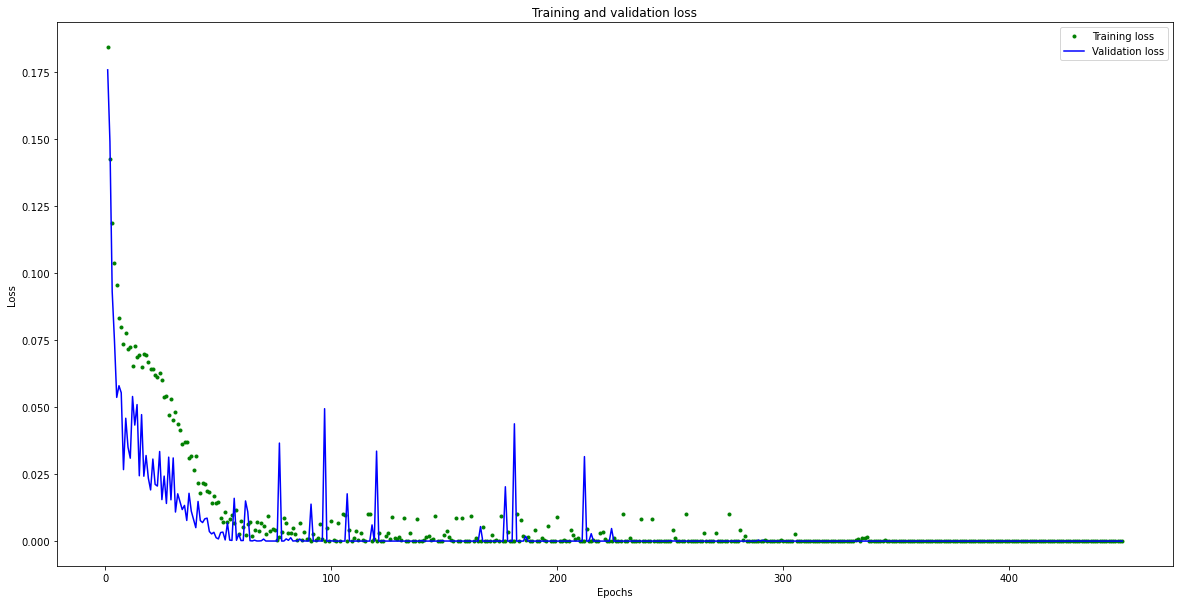

In [8]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

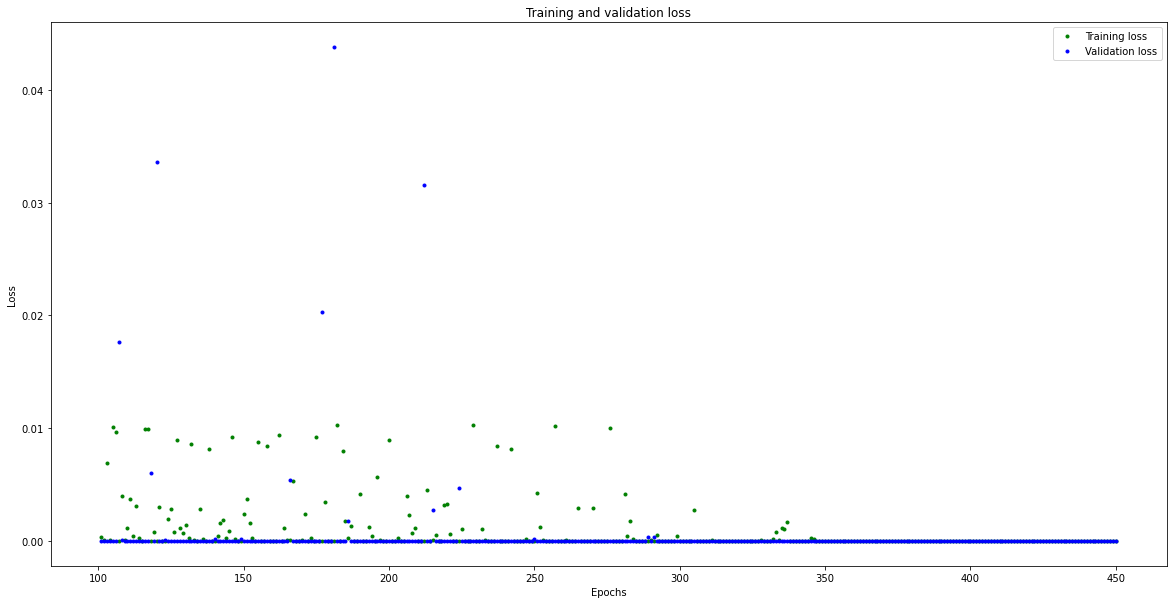

In [9]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

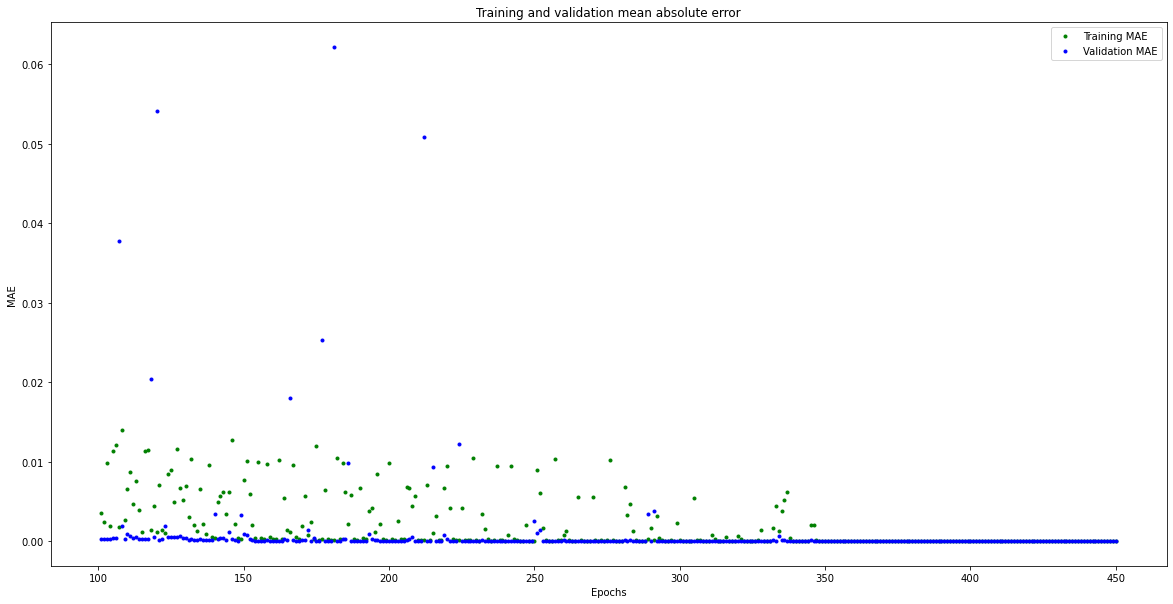

In [10]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Test data

In [12]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
# plt.clf()
# plt.title('Training data predicted vs actual values')
# plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
# plt.plot(inputs_test, predictions, 'r.', label='Predicted')
# plt.show()

predictions =
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
actual =
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


## Convert the Trained Model to Tensor Flow Lite

In [13]:
# WITHOUT QUANTIZATION
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\limke\AppData\Local\Temp\tmpjlrp4kkf\assets


171696

In [14]:
# DYNAMIC QUANTIZATION
converter_d = tf.lite.TFLiteConverter.from_keras_model(model)

#set the optimization flag
converter_d.optimizations = [tf.lite.Optimize.DEFAULT]

# convert model
model_dyn_quant_tflite = converter_d.convert()

# Save model to disk
open("gesture_model_d.tflite", "wb").write(model_dyn_quant_tflite)

INFO:tensorflow:Assets written to: C:\Users\limke\AppData\Local\Temp\tmpt91uyfve\assets


INFO:tensorflow:Assets written to: C:\Users\limke\AppData\Local\Temp\tmpt91uyfve\assets


46928

In [15]:
# FULL QUANTIZATION
converter_q = tf.lite.TFLiteConverter.from_keras_model(model)
converter_q.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
    for value in inputs_test:
        yield[np.array(value,dtype=np.float32, ndmin=2)]
        
converter_q.representative_dataset = representative_dataset_generator

model_tflite_q = converter_q.convert()

# Save model to disk
open("gesture_model_q.tflite", "wb").write(model_tflite_q)

INFO:tensorflow:Assets written to: C:\Users\limke\AppData\Local\Temp\tmp6ds__gf0\assets


INFO:tensorflow:Assets written to: C:\Users\limke\AppData\Local\Temp\tmp6ds__gf0\assets


45248

In [16]:
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

dyn_quantized_model_size = os.path.getsize("gesture_model_d.tflite")
print("Dyn Quantized Model is %d bytes" % dyn_quantized_model_size)

quantized_model_size = os.path.getsize("gesture_model_q.tflite")
print("Full Quantized model is %d bytes" % quantized_model_size)

# difference = basic_model_size - quantized_model_size
# print("Reduced by %d bytes" % difference)

Model is 171696 bytes
Dyn Quantized Model is 46928 bytes
Full Quantized model is 45248 bytes


## Deploy to MCU

In [17]:
# Function: Convert same hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ''
    
    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'
    
    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'
    
    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :
        
        # Construct string from hex
        hex_str = format(val, '#04x')
        
        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)
        
    # Add closing brace
    c_str += '\n ' + format(''.join(hex_array)) + '\n};\n\n'
    
    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'
    
    return c_str

In [18]:
# Write TFLite model to a C source (or header) file
with open("model.h", 'w') as file:
    file.write(hex_to_c_array(model_tflite_q, "model"))